# MULTILAYER PERCEPTRON FOR CLASSIFICATION USING KERAS SEQUENTIAL API

_**Use Keras sequential API to build and train a multiclass image classifier model, perform classification, and then evaluate performance.**_

In [61]:
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

## Retrieving & Analyzing the Dataset

It loads the fashion MNIST dataset over Keras. The dataset is already split between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. 55,000 images be used for training, and 5,000 for validation.

In [15]:
# Loads the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Extracts training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [17]:
# Checks the full training set size
print("Full train dataset shape:", X_train_full.shape)
print("Test dataset shape:", X_test.shape)

Full train dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)


In [19]:
# Prints labels for few instances
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


In [21]:
# The above lables are used as drop-in replacement for the following classes
# as noted from the dataset documentation
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

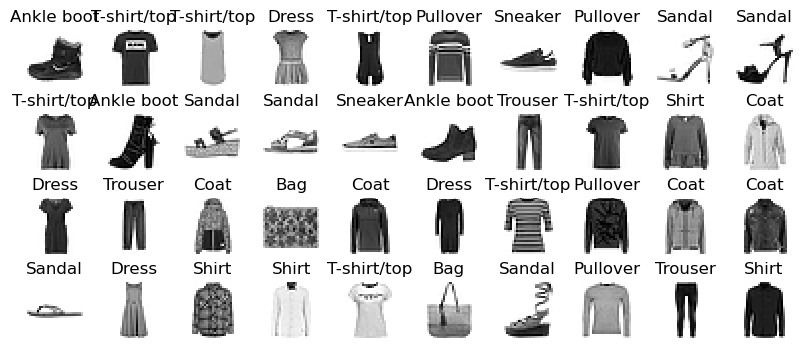

In [27]:
# Shows few of the fasion categories from the training data set

n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols, n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(categories[y_train_full[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
# Checks for each pixel intensity
print(X_train_full.dtype)

uint8


Each pixel is represented as a byte (0 to 255):

## Data Preparation

In [33]:
# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [35]:
# Checks the training and validation set size
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Train dataset shape: (55000, 28, 28)
Validation dataset shape: (5000, 28, 28)


In [37]:
# Scales the training, validation and testing data
X_train_scaled, X_val_scaled, X_test_scaled = X_train/255., X_val/255., X_test/255.

## Modeling

In [69]:
# Ensures the random weights of the hidden layers and the output layer will be
# the same every time the notebook is run
tf.random.set_seed(42)

# Initializes a sequential model to stack multiple layers of perceptrons.
model = tf.keras.Sequential()

# Initializes the following layers to be stacked into the model

# Initializes input layer with specific input shape
model.add(tf.keras.layers.Input(shape=[28, 28]))

# Initializes a flatten layer to convert each 2D input image [28 x 28 matrix] 
# into a 1D array of 784 elements [28 x 28 = 784]
model.add(tf.keras.layers.Flatten())

# Initializes a dense [hidden] layer with the specified number of output units and activation function.
model.add(tf.keras.layers.Dense(300, activation="relu"))

# Initializes another dense [hidden] layer with the specified number of output units and activation function.
model.add(tf.keras.layers.Dense(100, activation="relu"))

# Also, initializes an output [dense] layer with the specified number of output units and activation function.
# In this case, `softmax` activation function is used because the classes are exclusive and
# prediction as probability distribution over multiple classes are expected.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [43]:
# Shows the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
# [OPTIONAL]
# Visualizes the model architecture
# NOTE: This visualization has dependency on package PyPlot and GraphViz

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [73]:
# Configure the model for training
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [76]:
# Fits the model
# NOTE: The following step may several minutes to complete over a CPU

history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val))

Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7200 - accuracy: 0.7649 - val_loss: 0.4946 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4944 - accuracy: 0.8294 - val_loss: 0.4286 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4496 - accuracy: 0.8429 - val_loss: 0.4038 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4199 - accuracy: 0.8535 - val_loss: 0.3822 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3999 - accuracy: 0.8605 - val_loss: 0.3810 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 25s 14ms/step - loss: 0.3831 - accuracy: 0.8643 - val_loss: 0.3609 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3691 - accuracy: 0.8693 - val_loss: 0.3420 -

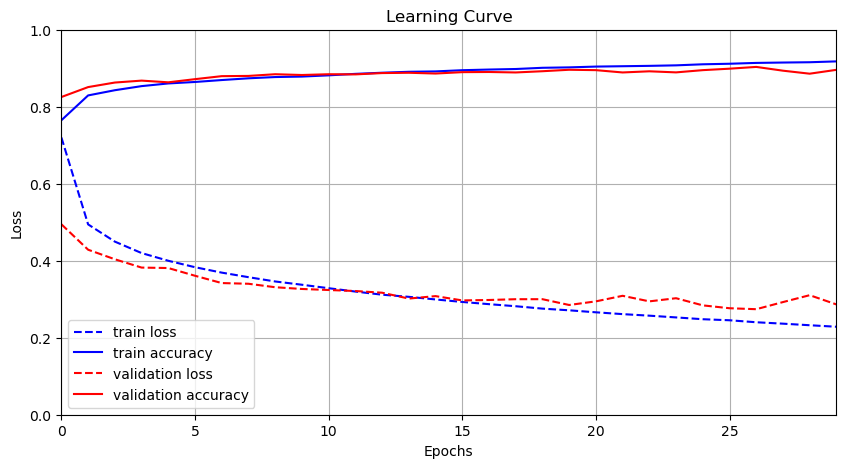

In [114]:
# Visualizing the learning curves

plt.figure(figsize=(10,5))  # Sets width and height of the figure in inches

# Plots the train loss, train accuracy, val. loss and val. accuracy over epochs

plt.plot(history.history["loss"], "b--", label="train loss")
plt.plot(history.history["accuracy"], "b-", label="train accuracy")
plt.plot(history.history["val_loss"], "r--", label="validation loss")
plt.plot(history.history["val_accuracy"], "r-", label="validation accuracy")

# Sets the other parameters of the figure for professional rendering

plt.xlim(0, 29)
plt.ylim(0, 1)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.grid()
plt.legend()
plt.title("Learning Curve")

plt.show()

## Performance Evaluation

**Making predictions**

In [171]:
# Makes predictions for first 10 instance from test set

test_pred_probas = model.predict(X_test[:10])
print(test_pred_probas.round(2))

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [173]:
# Extracts predictions (drop-in replacement for categories) from the probability distribution

test_preds = test_pred_probas.argmax(axis=-1)
print(test_preds)

[9 2 1 1 6 1 4 6 5 7]


In [238]:
# Extracts mapped categories from predicted category indexes
test_pred_categories = [categories[test_pred] for test_pred in test_preds]

# Extracts mapped categories from category indexes for test instances
true_categories = [categories[y] for y in y_test[:10]]

In [240]:
# Shows predicted and true categories side-by-side for comparison
pd.DataFrame({
    "Predicted Category": test_pred_categories,
    "True Category": true_categories
})

,Predicted Category,True Category
0,Ankle boot,Ankle boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
5,Trouser,Trouser
6,Coat,Coat
7,Shirt,Shirt
8,Sandal,Sandal
9,Sneaker,Sneaker


**Evaluating the model over entire test set**

In [243]:
# Performs prediction over entire test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3397 - accuracy: 0.8778


In [245]:
# Evaluates the model 

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.0f}%".format(test_accuracy * 100))

Test loss: 0.34
Test accuracy: 88%


## Observations

_Write your observations about the above experiment on MLP for classification using Keras sequential API._

# MULTILAYER PERCEPTRON FOR REGRESSION USING KERAS SEQUENTIAL API [EXTRA]

_**Use Keras sequential API to build a regressor, perform predictions, and then evaluate performance.**_

In [164]:
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf

from random import sample

#import datetime
import matplotlib.pyplot as plt

## Retrieving & Analyzing the Dataset

In [30]:
# Loads the Calfornia housing dataset for regression
housing = fetch_california_housing(as_frame=True)

# Shows top few instances combining corresponding target
display(housing.data.assign(target = housing.target).head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


NOTE: Values in target ranges between 0.15 and 5 and each value corresponds to the average house value in units of 100,000.


In [33]:
# Checks the basic information about the dataset
print(housing.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


The above information shows the dataset has 
- more than 20,000 instances,
- 8 numerical features and
- it does not have any missing values.

In [36]:
housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

## Data Preparation

In [41]:
# Considering the range of the house prices, each training instance is put into a bin according it its price.
# NOTE: It will be required later during dataset splitting for test set to have same distribution as that of the training set.
target_bin = pd.cut(housing.target, bins=[0, 1.0, 2.0, 3.0, 4.0, 6.0], labels=[1, 2, 3, 4, 5])

In [48]:
#  After associating a bin with each training instance, it randomly selects
# few instances and shows this association (just for reference).
sample(list(zip(housing.target, target_bin)), 10)

[(1.088, 2),
 (3.76, 4),
 (2.724, 3),
 (5.00001, 5),
 (1.798, 2),
 (1.5, 2),
 (1.292, 2),
 (3.13, 4),
 (1.538, 2),
 (1.602, 2)]

In [56]:
# Prepares training and testing set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42, stratify=target_bin)

# Takes out validation set from full training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [58]:
# Checks the shape of training, validation and test set

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (12384, 8)
Validation set shape: (4128, 8)
Test set shape: (4128, 8)


In [63]:
X_train.shape[1:]

(8,)

## Modeling

In [142]:
# Ensures the random weights of the hidden layers and the output layer will be
# the same every time the notebook is run
tf.random.set_seed(42)

# Initializes a sequential model to stack multiple layers of perceptrons.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=[8]))

# Initializes a preprocessing layer that normalizes continuous features by shifting and 
# scaling inputs into a distribution centered around 0 with standard deviation 1

#model.add(tf.keras.layers.Normalization(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Normalization(axis=-1))

# Initializes 3 dense [hidden] layers each with the specified number of output units and 
# activation function and get added into model
model.add(tf.keras.layers.Dense(50, activation="relu"))

model.add(tf.keras.layers.Dense(50, activation="relu"))

model.add(tf.keras.layers.Dense(50, activation="relu"))

# Lastly, initializes a dense [output] layer with just 1 output unit with no activation function
model.add(tf.keras.layers.Dense(1))


In [143]:
# Shows the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 50)                450       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,618
Trainable params: 5,601
Non-trainable params: 17
___________________________________________________

In [144]:
# Configure the model for training
model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])

In [145]:
# Computes the mean and variance of the train set and stores them as the layer's weights
model.layers[0].adapt(X_train)

In [146]:
# Fits the model
# NOTE: The following step may few minutes to complete over a CPU

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
387/387 [==============================] - 3s 5ms/step - loss: 1.1630 - root_mean_squared_error: 1.0784 - val_loss: 0.4742 - val_root_mean_squared_error: 0.6887
Epoch 2/20
387/387 [==============================] - 2s 5ms/step - loss: 0.4310 - root_mean_squared_error: 0.6565 - val_loss: 0.3939 - val_root_mean_squared_error: 0.6276
Epoch 3/20
387/387 [==============================] - 2s 4ms/step - loss: 0.3918 - root_mean_squared_error: 0.6259 - val_loss: 0.3561 - val_root_mean_squared_error: 0.5967
Epoch 4/20
387/387 [==============================] - 2s 4ms/step - loss: 0.3574 - root_mean_squared_error: 0.5978 - val_loss: 0.3491 - val_root_mean_squared_error: 0.5909
Epoch 5/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3356 - root_mean_squared_error: 0.5793 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5771
Epoch 6/20
387/387 [==============================] - 2s 5ms/step - loss: 0.3235 - root_mean_squared_error: 0.5688 - val_loss: 0.3192 - val_

In [168]:
history.history

{'loss': [1.1629939079284668,
  0.4309940040111542,
  0.39177456498146057,
  0.35740798711776733,
  0.3356077969074249,
  0.32352134585380554,
  0.31453409790992737,
  0.3071345090866089,
  0.32120367884635925,
  0.3079296052455902,
  0.29093867540359497,
  0.2861258089542389,
  0.2820441722869873,
  0.27818405628204346,
  0.2765921354293823,
  0.2792198061943054,
  0.2746802568435669,
  0.27104270458221436,
  0.2663629353046417,
  0.2767132818698883],
 'root_mean_squared_error': [1.078421950340271,
  0.6565013527870178,
  0.625918984413147,
  0.5978360772132874,
  0.5793166756629944,
  0.5687893629074097,
  0.5608333945274353,
  0.5541971921920776,
  0.566748321056366,
  0.5549140572547913,
  0.5393872857093811,
  0.5349072813987732,
  0.5310783386230469,
  0.5274315476417542,
  0.5259202718734741,
  0.5284125208854675,
  0.5240994691848755,
  0.5206176042556763,
  0.5161036252975464,
  0.5260354280471802],
 'val_loss': [0.4742487967014313,
  0.39393851161003113,
  0.3560866415500641,

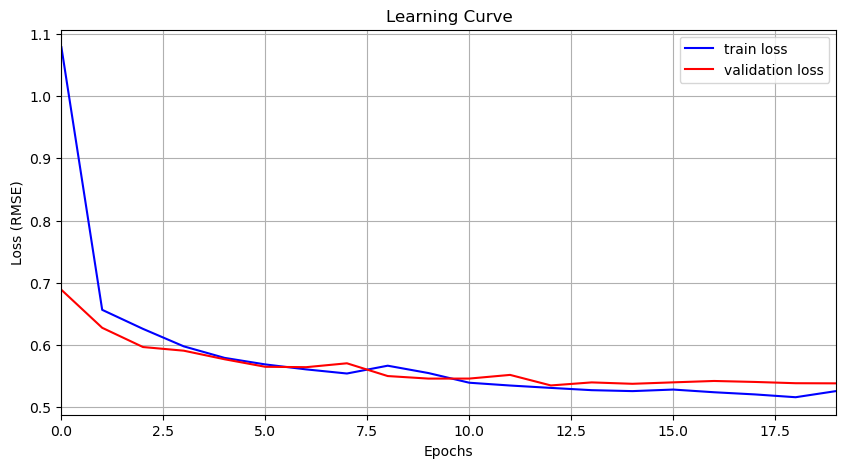

In [174]:
# Visualizing the learning curves

plt.figure(figsize=(10,5))  # Sets width and height of the figure in inches

# Plots the train loss and validation loss over epochs

plt.plot(history.history["root_mean_squared_error"], "b-", label="train loss")
plt.plot(history.history["val_root_mean_squared_error"], "r-", label="validation loss")

# Sets the other parameters of the figure for professional rendering

plt.xlim(0, 19)

plt.xlabel("Epochs")
plt.ylabel("Loss (RMSE)")

plt.grid()
plt.legend()
plt.title("Learning Curve")

plt.show()

## Performance Evaluation

**Making predictions**

In [152]:
# Makes predictions for first 10 instance from test set
test_preds = model.predict(X_test[:10])
print(test_preds.round(2))

1/1 [==============================] - 0s 83ms/step
[[1.57]
 [1.84]
 [2.12]
 [1.66]
 [0.77]
 [2.09]
 [1.26]
 [2.84]
 [1.69]
 [1.72]]


In [154]:
# Shows predicted and true targets (side-by-side for comparison
pd.DataFrame({
    "Predicted target": test_preds.reshape(-1),
    "True target": y_test[:10]
})

,Predicted target,True target
5043,1.571631,1.185
6028,1.839167,1.401
7817,2.122284,2.365
16695,1.659371,2.099
12799,0.771679,0.814
8026,2.085523,2.209
236,1.263411,1.220
3606,2.836555,2.399
1234,1.691872,1.558
695,1.722164,1.375


**Evaluating the model over entire test set**

In [157]:
# Evaluates the model
mse_test, rmse_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 1s 4ms/step - loss: 0.2993 - root_mean_squared_error: 0.5471


In [159]:
# Evaluates the model 

print("Test loss in MSE: {:.2f}".format(mse_test))
print("Test loss in RMSE: {:.2f}".format(rmse_test))

Test loss in MSE: 0.30
Test loss in RMSE: 0.55


## Observations

_Write your observations about the above experiment on MLP for regression using Keras sequential API._